In [1]:
#NB: Kaggle requires phone verification to use the internet or a GPU. If you haven't done that yet, the cell below will fail
#    This code is only here to check that your internet is enabled. It doesn't do anything else.
#    Here's a help thread on getting your phone number verified: https://www.kaggle.com/product-feedback/135367

import socket,warnings
try:
    socket.setdefaulttimeout(1)
    socket.socket(socket.AF_INET, socket.SOCK_STREAM).connect(('1.1.1.1', 53))
except socket.error as ex: raise Exception("STOP: No internet. Click '>|' in top right and set 'Internet' switch to on")

In [3]:
from pathlib import Path

data_root=Path('data/hobbithouseinc/other/www.hobbithouseinc.com/personal/woodpics')

data_dirs = [x for x in data_root.iterdir() if x.is_dir()]
data_dirs = [x for x in data_dirs if not x.match('_*')]
data_dirs = [x for x in data_dirs if not x.match('images')]

In [5]:
from fastai.vision.all import *

class WoodPicture:
    def __init__(self, name, path):
        self.name = name
        self.path = path

    def image(self):
        return Image.open(self.path)

class WoodPictures:
    def __init__(self, path):
        self.path = path
        self.name = path.name
        image_files = [x for x in path.iterdir() if x.is_file() and x.match('*.jpg')]
        self.end_grain_image_files = [x for x in image_files if x.match('*end grain*')]
        self.non_end_grain_image_files = [x for x in image_files if not x.match('*end grain*')]
        
    def images(self):
        return [WoodPicture(self.name, x) for x in self.non_end_grain_image_files]

In [6]:
# Load all images
woods = [WoodPictures(x) for x in data_dirs]
len(woods)

429

Name: fir


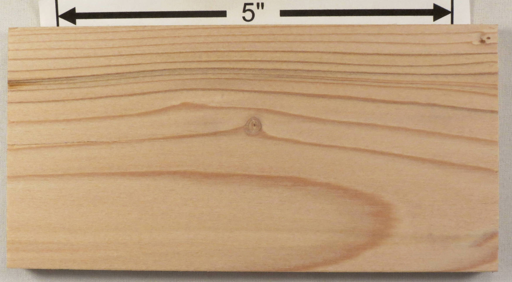

In [121]:
wood = woods[10]
print(f"Name: {wood.name}")
images = wood.images()
images[1].image().to_thumb(512,512)

In [25]:
images = [x for wood in woods[0:10] for x in wood.images()]
len(images)

2467

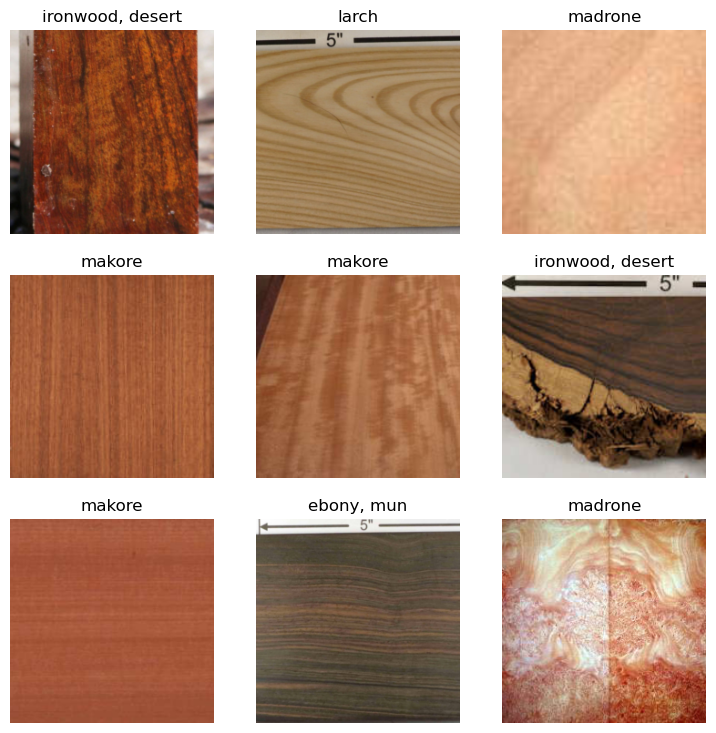

In [26]:
def get_images(x):
    return x

def get_path(x):
    return x.path
    
def get_name(x):
    return x.name

dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_images,
    get_x=get_path,
    get_y=get_name,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    item_tfms=Resize(224),
).dataloaders(images, bs=32)

dls.show_batch(max_n=9, nrows=3)

In [27]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(10)

/home/kovyrin/anaconda3/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/kovyrin/anaconda3/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


epoch,train_loss,valid_loss,error_rate,time
0,2.121758,1.014724,0.324544,04:18


epoch,train_loss,valid_loss,error_rate,time
0,1.066243,0.693853,0.223124,06:41
1,0.713800,0.442447,0.123732,06:07
2,0.496432,0.419610,0.121704,06:22
3,0.379643,0.367762,0.091278,05:58
4,0.245773,0.339119,0.085193,06:47


In [19]:
!ls data

hobbithouseinc		  madrone-wood-species.jpg:Zone.Identifier
madrone-wood-species.jpg


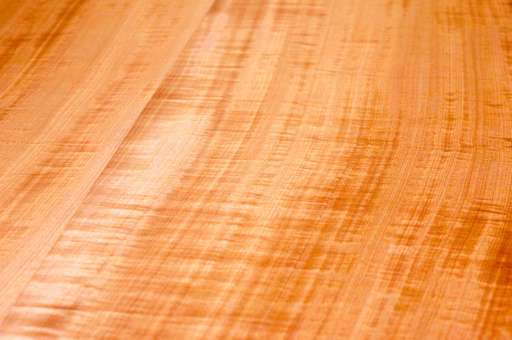

In [21]:
madrone = PILImage.create('data/madrone-wood-species.jpg')
madrone.to_thumb(512,512)

In [22]:
learn.predict(madrone)

('madrone', TensorBase(1), TensorBase([0.0011, 0.9989]))